In [1]:
import tensorflow as tf
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_data(dir_list,image_size):

    #load all images in a directory
    x = []
    y = []
    image_width, image_height = image_size

    for directory in dir_list:
        for filename in listdir(directory):
            image = cv2.imread(directory + '\\'+filename)   #load the image
#             image = crop_brain_contour(image,plot=False)  # crop the brain part and ignore unnecessary part of image
            image = cv2.resize(image,dsize=(image_width, image_height),interpolation=cv2.INTER_CUBIC)  #resizing
            image = image /255   # normalize values
            x.append(image) #convert image to numpy array and append it to X

            if directory[-3:] == "yes":
                y.append([1])
            else:
                y.append([0])
    
    x = np.array(x)
    y = np.array(y)

    x, y = shuffle(x,y)   #shuffle the data

    print(f"Number of examples is: {len(x)}")
    print(f"X shape is: {x.shape}")
    print(f"y shape is: {y.shape}")

    return x,y

In [3]:
train_path = "Brain_image_dataSet/"
yes = train_path + "train/yes"
no = train_path + "train/no"

In [4]:
IMG_WIDTH, IMG_HEIGHT = (180,180)

In [5]:
xtrain, ytrain = load_data([yes,no],(IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 2100
X shape is: (2100, 180, 180, 3)
y shape is: (2100, 1)


In [6]:
test_path = "Brain_image_dataSet/"
yes = test_path + "test/yes"
no = test_path + "test/no"

In [7]:
xtest, ytest = load_data([yes,no],(IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 900
X shape is: (900, 180, 180, 3)
y shape is: (900, 1)


In [8]:
def plot_sample_images(x,y,n=50):

    for label in [0,1]:
        images = x[np.argwhere(y == label)]
        n_images = images[:n]

        columns_n  = 10
        rows_n = int(n/columns_n)

        plt.figure(figsize=(20,10))

        i=1
        for image in n_images:
            plt.subplot(rows_n,columns_n,i)
            plt.imshow(image[0])

            plt.tick_params(axis='both',which='both',
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False,labeltop=False,labelleft=False,labelright=False)
            
            i += 1

        label_to_str = lambda label:"Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

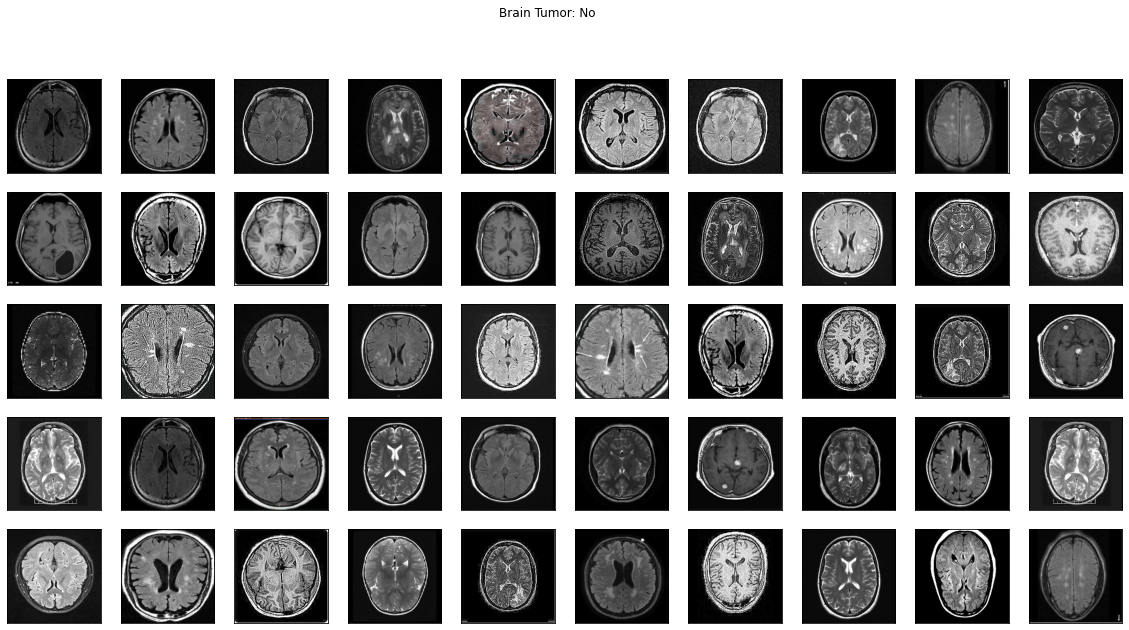

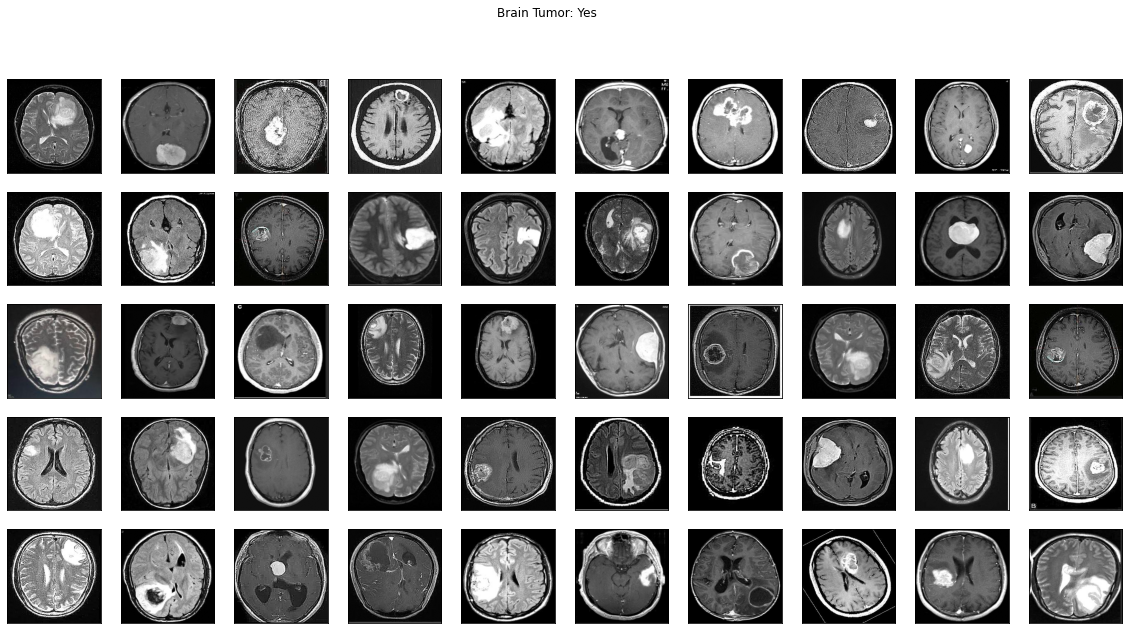

In [9]:
plot_sample_images(xtrain,ytrain)

In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(255, activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [14]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest), epochs=10)

Epoch 1/10
66/66 [==============================] - 47s 698ms/step - loss: 0.6584 - accuracy: 0.5867 - val_loss: 0.5713 - val_accuracy: 0.7222
Epoch 2/10
66/66 [==============================] - 43s 643ms/step - loss: 0.5117 - accuracy: 0.7457 - val_loss: 0.5031 - val_accuracy: 0.7489
Epoch 3/10
66/66 [==============================] - 44s 663ms/step - loss: 0.4567 - accuracy: 0.7824 - val_loss: 0.4955 - val_accuracy: 0.7800
Epoch 4/10
66/66 [==============================] - 46s 703ms/step - loss: 0.4188 - accuracy: 0.8062 - val_loss: 0.4821 - val_accuracy: 0.8189
Epoch 5/10
66/66 [==============================] - 47s 706ms/step - loss: 0.3780 - accuracy: 0.8286 - val_loss: 0.3974 - val_accuracy: 0.8056
Epoch 6/10
66/66 [==============================] - 47s 706ms/step - loss: 0.3193 - accuracy: 0.8648 - val_loss: 0.3489 - val_accuracy: 0.8489
Epoch 7/10
66/66 [==============================] - 46s 698ms/step - loss: 0.2678 - accuracy: 0.8938 - val_loss: 0.3834 - val_accuracy: 0.8267

In [15]:
history = model.history.history

In [16]:
for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


In [17]:
def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss,label="training loss")
    plt.plot(val_loss,label="validation loss")
    plt.title("Loss")
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_accuracy,label="training accuracy")
    plt.plot(val_accuracy,label="validation accuracy")
    plt.title("Accuracy")
    plt.legend()
    plt.show()

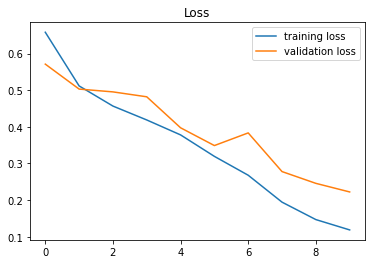

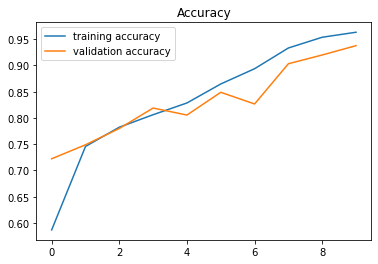

In [18]:
plot_metrics(history)

In [19]:
loss, accu = model.evaluate(xtest,ytest)

29/29 [==============================] - 4s 139ms/step - loss: 0.2222 - accuracy: 0.9378


In [20]:
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accu}")

Test Loss: 0.22215501964092255
Test Accuracy: 0.9377777576446533


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 32)       

In [22]:
ypred = model.predict(xtest)

29/29 [==============================] - 4s 119ms/step


In [23]:
ypred.shape

(900, 1)

In [39]:
ypred.reshape((-1,))

array([9.83241737e-01, 4.91497398e-04, 9.75432813e-01, 6.89314306e-02,
       9.43953931e-01, 9.97431695e-01, 9.95089531e-01, 9.94497836e-01,
       4.04646562e-04, 7.62397656e-03, 1.02455437e-01, 8.49889338e-01,
       9.98365164e-01, 7.74337128e-02, 8.88408795e-06, 9.61803854e-01,
       9.86214161e-01, 9.90769029e-01, 6.12733274e-05, 7.73368083e-05,
       7.17326880e-01, 7.47160733e-01, 4.51360375e-01, 6.17242716e-02,
       1.87750834e-06, 8.76862824e-01, 8.94683838e-01, 3.29410820e-03,
       9.87754047e-01, 6.06859863e-01, 3.38063037e-05, 9.53448713e-01,
       1.19953220e-04, 9.89922702e-01, 9.98960197e-01, 3.04519217e-05,
       8.61055255e-01, 9.91828144e-01, 3.54255713e-03, 9.92471755e-01,
       1.29048387e-03, 5.30154910e-04, 9.69509482e-01, 1.96794956e-03,
       7.06601381e-01, 7.83032417e-01, 8.48264456e-01, 9.97447431e-01,
       4.42624383e-04, 9.37348247e-01, 6.21337831e-01, 1.08556019e-03,
       1.47186117e-02, 1.51970366e-03, 9.90270138e-01, 1.24201796e-03,
      

In [40]:
ypred.shape

(900, 1)

In [25]:
tf.math.confusion_matrix(
    labels,
    predictions,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

309